In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
data = pd.read_csv("C:/Users/jhjjh/Downloads/EDA_final.csv")
data.head()

,Unnamed: 0,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
0,3497,2,4,moderate,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
1,14495,7,5,vigorous,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
2,14969,8,3,light,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
3,10111,5,5,vigorous,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
4,2422,2,2,light,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660


Text(0.5, 1.0, 'Label')

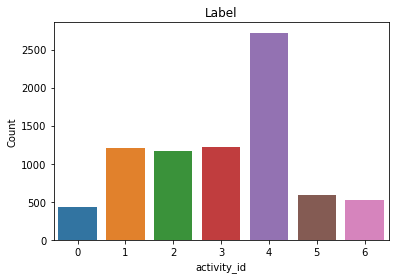

In [90]:
sns.countplot(data = data, x="activity_id")
plt.xlabel("activity_id")
plt.ylabel("Count")
plt.title("Label")

In [91]:
data.isnull().sum()

Unnamed: 0          0
sub_id              0
activity_id         0
act_level           0
hand_acc_x_mean     0
hand_acc_x_std      0
hand_acc_y_mean     0
hand_acc_y_std      0
hand_acc_z_mean     0
hand_acc_z_std      0
hand_gyr_x_mean     0
hand_gyr_x_std      0
hand_gyr_y_mean     0
hand_gyr_y_std      0
hand_gyr_z_mean     0
hand_gyr_z_std      0
chest_acc_x_mean    0
chest_acc_x_std     0
chest_acc_y_mean    0
chest_acc_y_std     0
chest_acc_z_mean    0
chest_acc_z_std     0
chest_gyr_x_mean    0
chest_gyr_x_std     0
chest_gyr_y_mean    0
chest_gyr_y_std     0
chest_gyr_z_mean    0
chest_gyr_z_std     0
ankle_acc_x_mean    0
ankle_acc_x_std     0
ankle_acc_y_mean    0
ankle_acc_y_std     0
ankle_acc_z_mean    0
ankle_acc_z_std     0
ankle_gyr_x_mean    0
ankle_gyr_x_std     0
ankle_gyr_y_mean    0
ankle_gyr_y_std     0
ankle_gyr_z_mean    0
ankle_gyr_z_std     0
dtype: int64

In [92]:
X = data.drop(['activity_id'], axis =1)
y = data['activity_id']

In [93]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [94]:
X_train.shape

(6279, 39)

In [95]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(45,input_shape=(39,),activation='sigmoid'))
model.add(Dense(35,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.004),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 45)                1800      
                                                                 
 dense_57 (Dense)            (None, 35)                1610      
                                                                 
 dense_58 (Dense)            (None, 10)                360       
                                                                 
 dense_59 (Dense)            (None, 7)                 77        
                                                                 
Total params: 3,847
Trainable params: 3,847
Non-trainable params: 0
_________________________________________________________________


C:\Users\jhjjh\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [96]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
197/197 [==============================] - 1s 4ms/step - loss: 1.5597 - accuracy: 0.4561 - val_loss: 1.4006 - val_accuracy: 0.4911
Epoch 2/30
197/197 [==============================] - 1s 3ms/step - loss: 1.3011 - accuracy: 0.5407 - val_loss: 1.2023 - val_accuracy: 0.5987
Epoch 3/30
197/197 [==============================] - 1s 3ms/step - loss: 1.3011 - accuracy: 0.5372 - val_loss: 1.3721 - val_accuracy: 0.4936
Epoch 4/30
197/197 [==============================] - 0s 2ms/step - loss: 1.2824 - accuracy: 0.5214 - val_loss: 1.0882 - val_accuracy: 0.5885
Epoch 5/30
197/197 [==============================] - 0s 3ms/step - loss: 1.1331 - accuracy: 0.5555 - val_loss: 1.1007 - val_accuracy: 0.5465
Epoch 6/30
197/197 [==============================] - 1s 3ms/step - loss: 1.1444 - accuracy: 0.5757 - val_loss: 1.1211 - val_accuracy: 0.5758
Epoch 7/30
197/197 [==============================] - 1s 3ms/step - loss: 1.3640 - accuracy: 0.5179 - val_loss: 1.3318 - val_accuracy: 0.5306
Epoch 

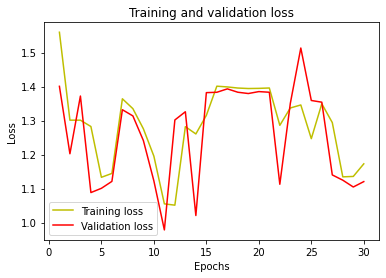

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

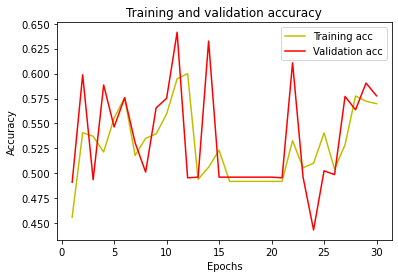

In [98]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       1.00      0.61      0.76       254
           2       0.45      0.94      0.61       226
           3       0.00      0.00      0.00       260
           4       0.57      1.00      0.73       538
           5       0.00      0.00      0.00       103
           6       0.00      0.00      0.00       104

    accuracy                           0.58      1570
   macro avg       0.29      0.37      0.30      1570
weighted avg       0.42      0.58      0.46      1570

[[  0   0   0   0  85   0   0]
 [  0 156  97   0   1   0   0]
 [  0   0 213   1  12   0   0]
 [  0   0 162   0  98   0   0]
 [  0   0   0   0 538   0   0]
 [  0   0   0   0 103   0   0]
 [  0   0   0   0 104   0   0]]


C:\Users\jhjjh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhjjh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jhjjh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
